In [3]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

In [4]:
def weighted_random_question(agreement_val, correct_ans):
    my_list = []
    for i in np.arange(1, 6):
        if i == correct_ans:
            my_list += [str(correct_ans)] * int(agreement_val * 100)
        else:
            if agreement_val >= 0.5:
                my_list += [str(i)] * int((1 - agreement_val) / abs(correct_ans - i) * 100)
            else:
                my_list += [str(i)] * int((1 - agreement_val) * abs(correct_ans - i) * 100)
    return int(rand.choice(my_list))

In [5]:
def weighted_random_pos_old(agreement_val, correct_ans, source_length):
    pos_range = int((1 - agreement_val) ** 2 / 2 * source_length)
    start = correct_ans - pos_range
    end = correct_ans + pos_range + 1
    if start < 0:
        start = 0
    if end > source_length:
        end = source_length
    interval = np.arange(start, end)
    result = []
    for i in interval:
        if i == correct_ans:
            result += [str(i)] * int(agreement_val ** 2 * 100)
        else:
            result += [str(i)] * int(agreement_val ** 2/ (abs(correct_ans - i)) * 100)
    return int(rand.choice(result))

In [6]:
def weighted_random_pos(agreement_val, correct_ans, source_length):
    normal = np.random.normal(correct_ans, (1 - agreement_val) * 2 * source_length ** 0.5, 10000)
    return int(rand.choice(normal))

In [7]:
def get_highlight_length():
    normal = np.random.normal(50, 12, 10000)
    return int(rand.choice(normal))

In [8]:
def generate_agreement(agreement, num_users, num_questions, source_len):
    answer_number= np.zeros(0)
    start_pos = np.zeros(0)
    end_pos = np.zeros(0)
    for i in np.arange(num_questions):
        correct_ans = rand.randint(1, 5)
        correct_start = rand.randint(source_len / 4, source_len / 2)
        correct_end = correct_start + get_highlight_length()
        for j in np.arange(num_users):
            answer_number = np.append(answer_number, weighted_random_question(agreement[j], correct_ans))
            start = weighted_random_pos(agreement[j], correct_start, source_len)
            end = weighted_random_pos(agreement[j], correct_end, source_len)
            if start > end:
                temp = start
                start = end
                end = temp
            start_pos = np.append(start_pos, start)
            end_pos = np.append(end_pos, end)
    return answer_number, start_pos, end_pos

In [9]:
def create_run(agreement, num_run, num_users = 5, num_questions = 10, source_len = 4000, ans_type_prop = [1, 0]):
    rows = np.zeros(num_users * num_questions)
    inputs = generate_agreement(agreement, num_users, num_questions, source_len)
    d = {'taskrun_article_number': rows + num_run, 
         'contributor_id': np.tile(np.arange(1, num_users + 1), num_questions), 
         'question_number': np.repeat(np.arange(1, num_questions + 1), num_users), 
         'answer_number': inputs[0], 'start_pos': inputs[1], 
         'end_pos': inputs[2], 'source_text_length': rows + source_len, 
         'answer_type': np.append(np.repeat('nominal', int(ans_type_prop[0] * len(rows))),
                                       np.repeat('ordinal', int(ans_type_prop[1] * len(rows)))),
         'question_text': rows}
    run = pd.DataFrame(d)
    run = run[['taskrun_article_number', 'contributor_id', 
         'question_number', 'answer_number', 'start_pos', 
         'end_pos', 'source_text_length', 'answer_type', 'question_text']]
    return run

In [10]:
def create_series(agreement_arr, ans_type_prop = [1, 0]):
    for i in np.arange(len(agreement_arr)):
        current = create_run(agreement_arr[i], i, ans_type_prop = ans_type_prop)
        current.to_csv('Series_Output/Run' + str(i) + '.csv')

In [11]:
create_series([[0.9, 0.9, 0.9, 0.5, 0.1], [0.9, 0.9, 0.9, 0.5, 0.2], [0.9, 0.9, 0.9, 0.6, 0.3], 
               [0.9, 0.9, 0.9, 0.7, 0.4], [0.9, 0.9, 0.9, 0.8, 0.5], [0.9, 0.9, 0.9, 0.9, 0.5], 
               [0.9, 0.9, 0.9, 0.1, 0.6], [0.9, 0.9, 0.9, 0.1, 0.7], [0.9, 0.9, 0.9, 0.1, 0.8], 
               [0.9, 0.9, 0.9, 0.1, 0.9]])

In [12]:
create_series([[0.7, 0.7, 0.7, 0.7, 0.1], [0.7, 0.7, 0.7, 0.7, 0.5], [0.7, 0.7, 0.7, 0.7, 0.6], 
              [0.7, 0.7, 0.7, 0.7, 0.7], [0.7, 0.7, 0.7, 0.7, 0.8], [0.7, 0.7, 0.7, 0.7, 0.9],
              [0.7, 0.7, 0.7, 0.7, 0.9], [0.7, 0.7, 0.7, 0.7, 0.9], [0.7, 0.7, 0.7, 0.7, 0.9],
              [0.7, 0.7, 0.7, 0.7, 0.9]])

In [13]:
def create_arrays():
    dude = []
    array = [.9, .9, .1, .5, .1]
    inflection = False
    for i in range(50):
        if array[2] < 0.9:
            array[2] += 0.02
        if inflection == False and array[3] < 0.9:
            array[3] += 0.01
        if array[3] >= 0.9 or inflection == True:
            inflection = True
            array[3] -= 0.07
        dude.append(array[:])
    print(dude)
    return dude

In [14]:
create_series(create_arrays(), ans_type_prop = [0.7, 0.3])

[[0.9, 0.9, 0.12000000000000001, 0.51, 0.1], [0.9, 0.9, 0.14, 0.52, 0.1], [0.9, 0.9, 0.16, 0.53, 0.1], [0.9, 0.9, 0.18, 0.54, 0.1], [0.9, 0.9, 0.19999999999999998, 0.55, 0.1], [0.9, 0.9, 0.21999999999999997, 0.56, 0.1], [0.9, 0.9, 0.23999999999999996, 0.5700000000000001, 0.1], [0.9, 0.9, 0.25999999999999995, 0.5800000000000001, 0.1], [0.9, 0.9, 0.27999999999999997, 0.5900000000000001, 0.1], [0.9, 0.9, 0.3, 0.6000000000000001, 0.1], [0.9, 0.9, 0.32, 0.6100000000000001, 0.1], [0.9, 0.9, 0.34, 0.6200000000000001, 0.1], [0.9, 0.9, 0.36000000000000004, 0.6300000000000001, 0.1], [0.9, 0.9, 0.38000000000000006, 0.6400000000000001, 0.1], [0.9, 0.9, 0.4000000000000001, 0.6500000000000001, 0.1], [0.9, 0.9, 0.4200000000000001, 0.6600000000000001, 0.1], [0.9, 0.9, 0.4400000000000001, 0.6700000000000002, 0.1], [0.9, 0.9, 0.46000000000000013, 0.6800000000000002, 0.1], [0.9, 0.9, 0.48000000000000015, 0.6900000000000002, 0.1], [0.9, 0.9, 0.5000000000000001, 0.7000000000000002, 0.1], [0.9, 0.9, 0.52000

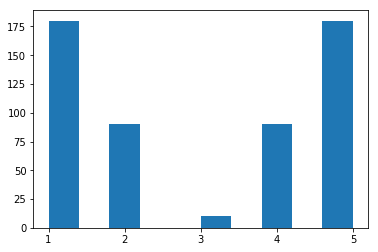

In [44]:
my_list = []
correct_ans = 3
agreement_val = 0.1
for i in np.arange(1, 6):
    if i == correct_ans:
        my_list += [str(correct_ans)] * int(agreement_val * 100)
    else:
        if agreement_val >= 0.5:
            my_list += [str(i)] * int((1 - agreement_val) / abs(correct_ans - i) * 100)
        else:
            my_list += [str(i)] * int((1 - agreement_val) * abs(correct_ans - i) * 100)
plt.hist(my_list)
plt.show()

710
1610
0 1610
200
['610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625', '626', '627', '628', '629', '630', '631', '632', '633', '634', '635', '636', '637', '638', '639', '640', '641', '642', '643', '644', '645', '646', '647', '648', '649', '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660', '660', '661', '661', '662', '662', '663', '663', '664', '664', '665', '665', '666', '666', '667', '667', '668', '668', '669', '669', '670', '670', '671', '671', '672', '672', '673', '673', '674', '674', '675', '675', '676', '676', '677', '677', '677', '678', '678', '678', '679', '679', '679', '680', '680', '680', '681', '681', '681', '682', '682', '682', '683', '683', '683', '684', '684', '684', '685', '685', '685', '685', '686', '686', '686', '686', '687', '687', '687', '687', '688', '688', '688', '688', '689', '689', '689', '689', '690', '690', '690', '690', '690', '691', '691', '691', '691', '691', '692', '692',

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


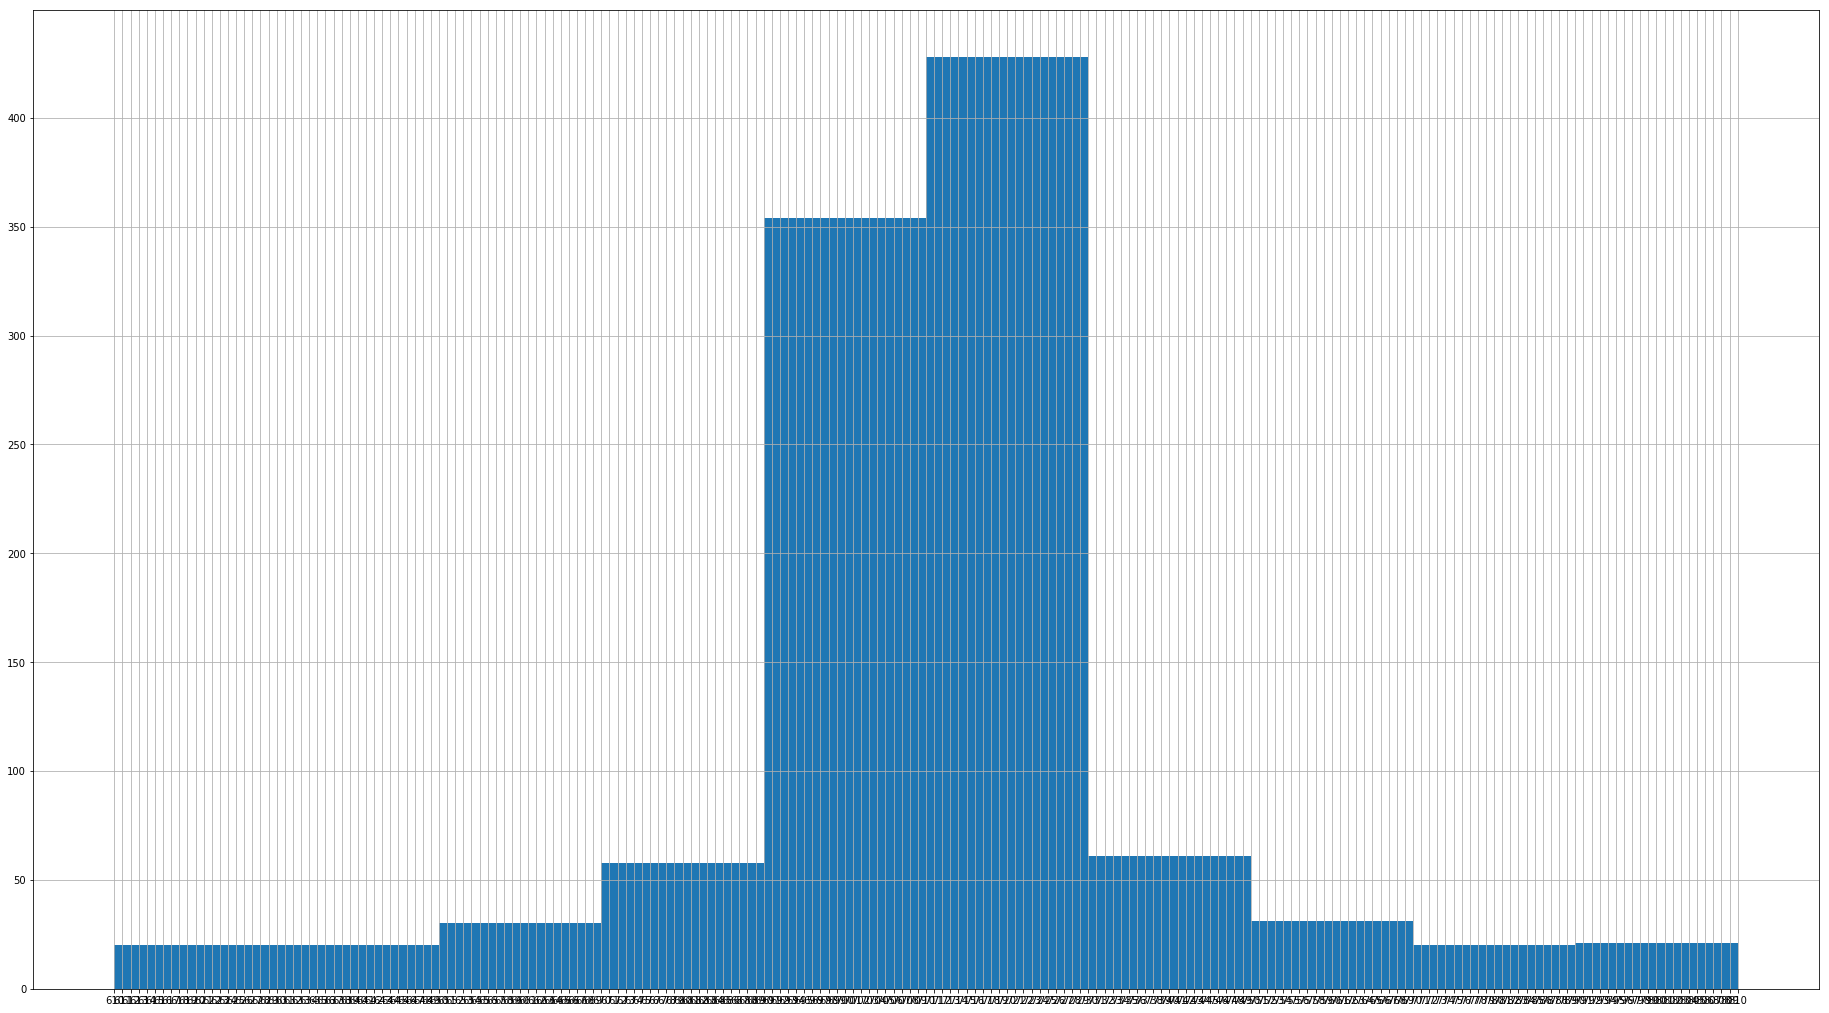

In [39]:
source_length = 2000
correct_ans = rand.randint(source_length / 4, source_length / 2)
#correct_ans = rand.randint(correct_start, source_length)
agreement_val = 0.1
pos_range = int((1 - agreement_val) / 2 * source_length)
start = correct_ans - pos_range
end = correct_ans + pos_range + 1
if start < 0:
    start = 0
if end > source_length:
    end = source_length
interval = np.arange(start, end)
result = []
for i in interval:
    if i == correct_ans:
        result += [str(i)] * int(agreement_val ** agreement_val * 100)
    else:
        result += [str(i)] * int(agreement_val / (abs(correct_ans - i) * agreement_val)  * 100)
print(correct_ans)
print(int(interval[len(interval) - 1]) - int(interval[0]))
print(int(interval[0]), int(interval[len(interval) - 1]))
print(int(result[len(result) - 1]) - int(result[0]))
print(result)
plt.figure(figsize = (32, 18))
plt.grid('on')
plt.hist(result)
plt.show()

1440
1428


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


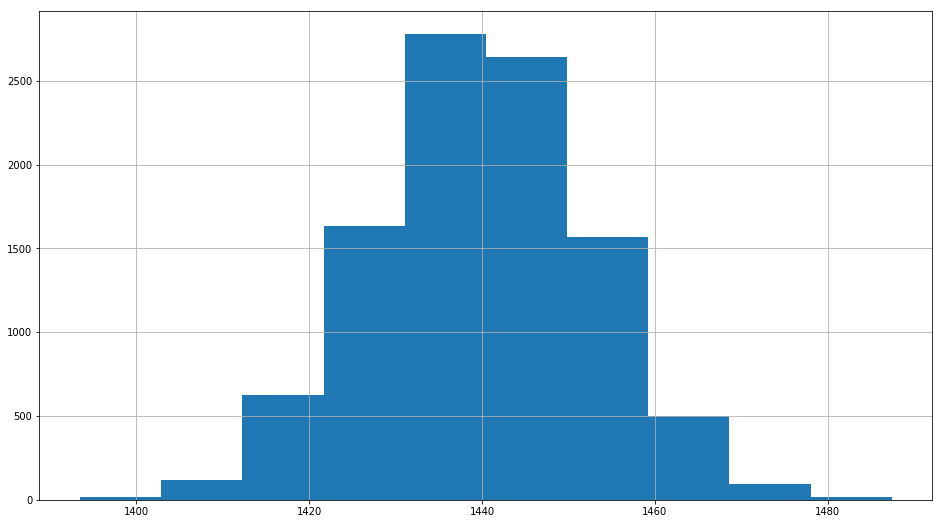

In [14]:
agreement_val = 0.9
source_length = 4000
correct_ans = rand.randint(source_length / 4, source_length / 2)
print(correct_ans)
normal = np.random.normal(correct_ans, (1 - agreement_val) * 2 * source_length ** 0.5, 10000)
print(int(rand.choice(normal)))
plt.figure(figsize = (16, 9))
plt.grid('on')
plt.hist(normal)
plt.show()

In [61]:
normal

array([1299.81542388, 1298.62059685, 1303.43140591, ..., 1300.91581038,
       1302.3158684 , 1304.22110321])